단어를 벡터로 만들어주는 과정 = 임베딩, 인코딩
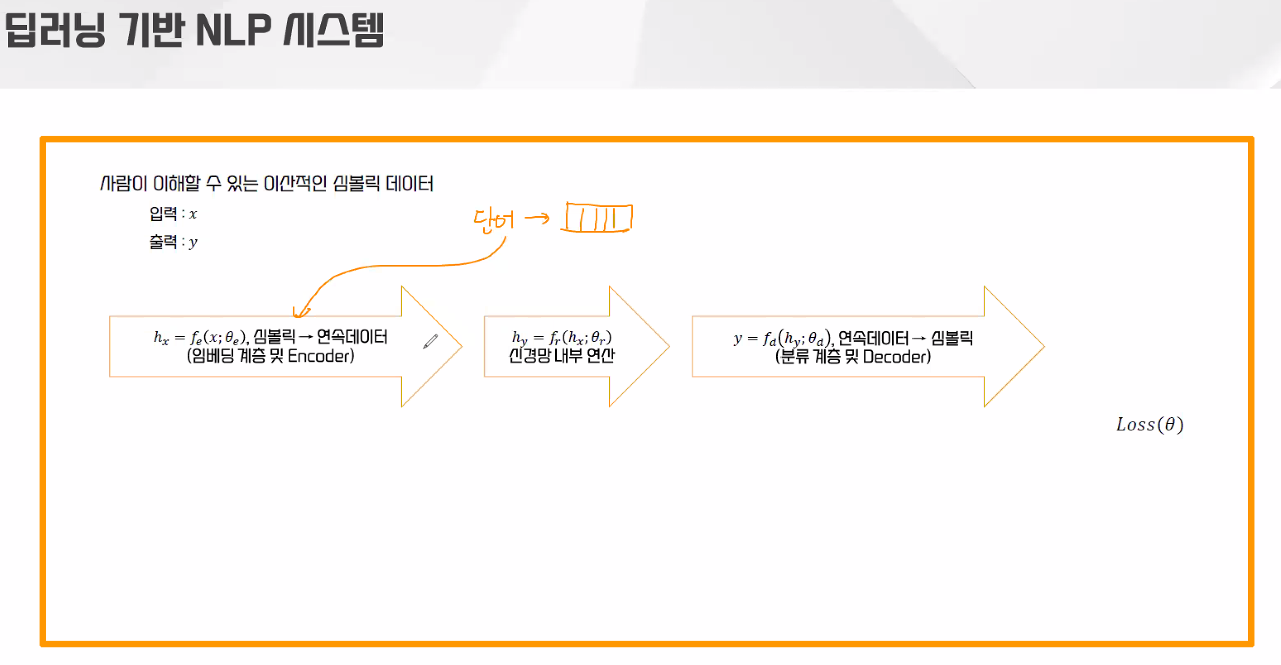

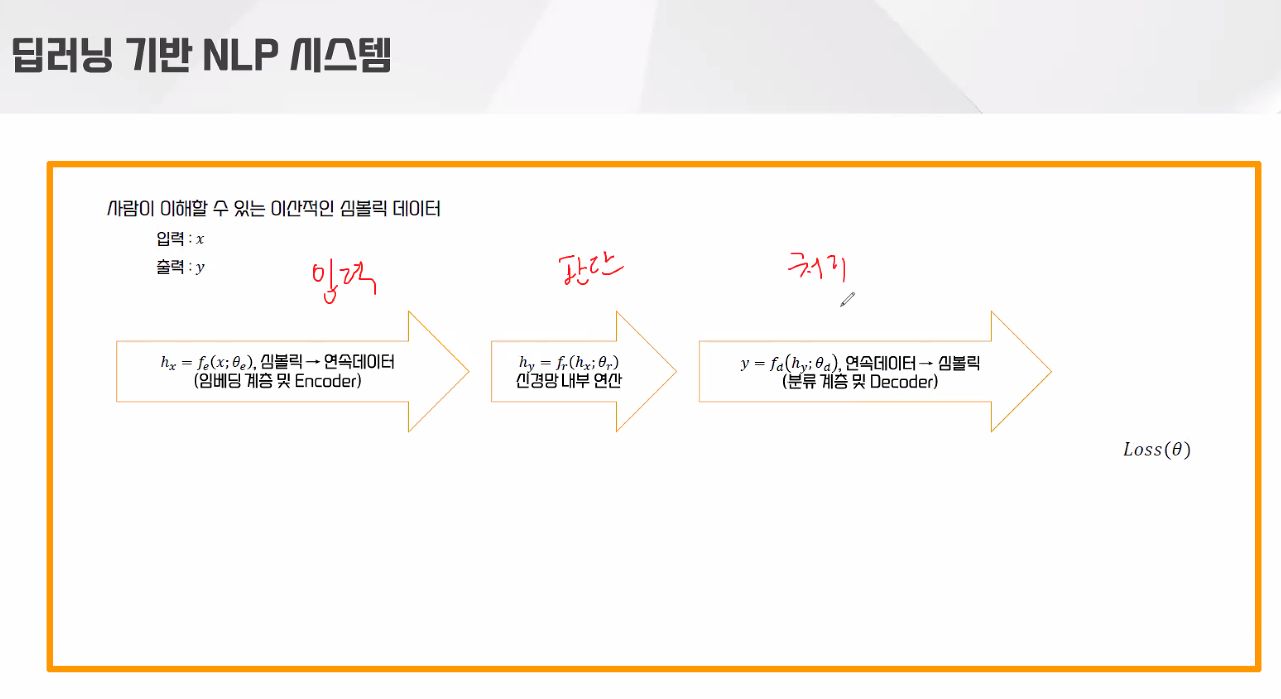

word sense = 단어의 의미

# 말뭉치 corpus
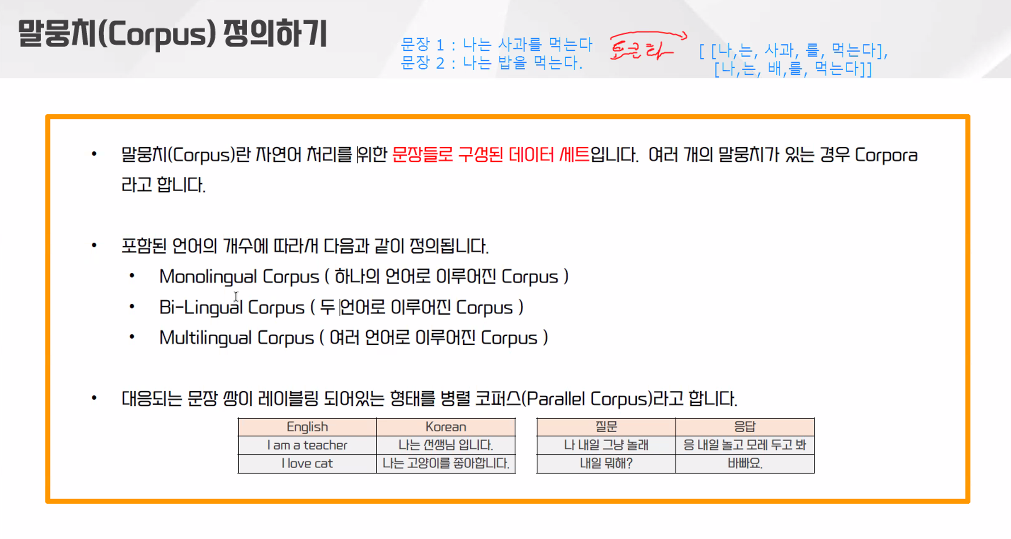

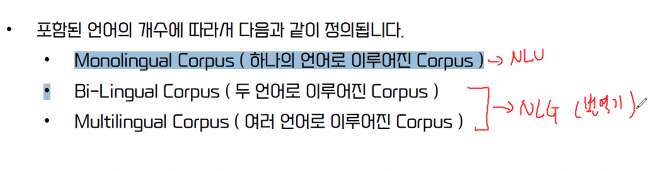

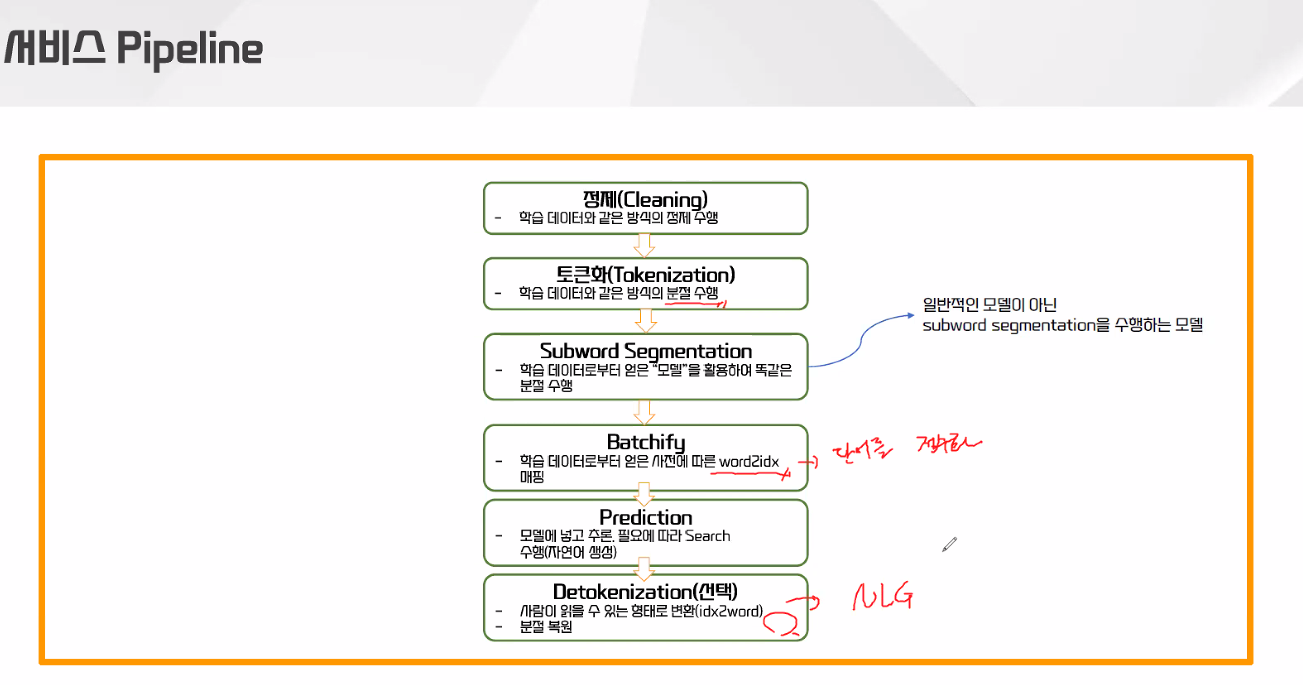

detokenization 정수를 단어로만들어주는 과정 NLG에서사용

# English Text Preprocessing


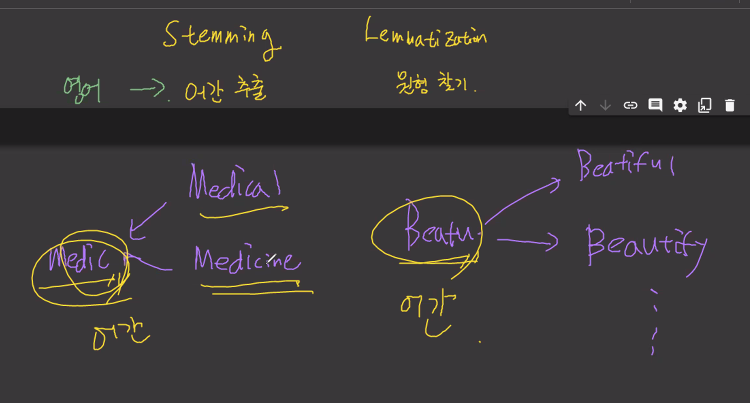

## Stemming 어간추출


In [17]:
# nltk : 영어를 처리할 수 있는 패키지 natural language toolkit
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

In [2]:
print(stemmer.stem('working')), print(stemmer.stem('works')), print(stemmer.stem('worked'))

work


In [18]:
print(stemmer.stem('happier'), stemmer.stem('fancier'), stemmer.stem('happiest')) 

happy fant happiest


### stemmer의 단점 : 기계적으로 원형을 찾다보니까 세상에 없는 단어가 만들어 지기도 함

In [9]:
print(stemmer.stem('this'))

thi


In [10]:
print(stemmer.stem('books'))

book


In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [20]:
# 쫌 다름 porterstemmer, lancasterstemmer 상황에 맞게 선택하기 좋다나쁘다개념 없음

print(stemmer.stem('working')), print(stemmer.stem('works')), print(stemmer.stem('worked'))
print(stemmer.stem('happier'), stemmer.stem('fancier')), print(stemmer.stem('happiest')) 
print(stemmer.stem('books'))
print(stemmer.stem('this'))

work
work
work
happier fancier
happiest
book
thi


## Lemmatization 원형찾기

In [21]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [22]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

"n" : 명사

"v" : 동사

"a" : 형용사

"r" : 부사

"s" : 위성 형용사(형용사 앞에있는 형용사)
  - very (beautiful)

In [24]:
print( lemmatizer.lemmatize('working', 'v')) # 동사에 대한 원형추출

work


In [25]:
print(lemmatizer.lemmatize('am', 'v'), lemmatizer.lemmatize('is', "v"), lemmatizer.lemmatize("are", 'v'))

be be be


In [26]:
print( lemmatizer.lemmatize('ate', 'v'))

eat


In [27]:
print( lemmatizer.lemmatize('books', 'n'))

book


In [28]:
print( lemmatizer.lemmatize('this', 'n'),  lemmatizer.lemmatize('dance', 'n'))

this dance


# Regular Expressions

In [34]:
eng_text_sample = """



I'm at a payphone, trying to call home.

All of my change I spent on you.

Where have the times gone?.

Baby, it's all wrong.

Where are the plans we made for two?



"""

eng_text_sample

"\n\n\n\nI'm at a payphone, trying to call home.\n\nAll of my change I spent on you.\n\nWhere have the times gone?.\n\nBaby, it's all wrong.\n\nWhere are the plans we made for two?\n\n\n\n"

In [35]:
import re

# 정규식 활용해서 개행문자 제거
eng_sent_re = re.sub("\n", " ", eng_text_sample) 
# re.sub : replace효과 치환효과
# 개행문자를 > 공백1칸으로 바꾸겠다.

eng_sent_re

"    I'm at a payphone, trying to call home.  All of my change I spent on you.  Where have the times gone?.  Baby, it's all wrong.  Where are the plans we made for two?    "

In [36]:
# 정규식으로 2번이상 공백이 있을시 한번으로 치환
eng_sent_re = re.sub("\s{2,}", " " , eng_sent_re) # 공백이 2번이상이라는뜻 
# \s는 공백문자임

eng_sent_re

" I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone?. Baby, it's all wrong. Where are the plans we made for two? "

In [37]:
# ? 나 ! 를 .으로 바꿔주기
eng_sent_re = re.sub("[!|?]", ".", eng_sent_re)
# or 기호 시프트+백슬러시

eng_sent_re

" I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two. "

## spacy 활용
- 서구권 언어들에 대한 토큰화, 어간찾기 등을 손쉽게 수행해 주는 라이브러리

In [42]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(eng_sent_re.strip())


doc.text

"I'm at a payphone, trying to call home. All of my change I spent on you. Where have the times gone.. Baby, it's all wrong. Where are the plans we made for two."

In [44]:
# 단어 토큰화 확인 및 형태소(POS : part of speech), Lemmatization 실행
for word_token in doc:
  print("word : {}\t\tPOS : {}\t\tLemma : {}".format(word_token.text, word_token.pos_, word_token.lemma_))

# 원래단어, 형태소, 원형


word : I		POS : PRON		Lemma : I
word : 'm		POS : AUX		Lemma : be
word : at		POS : ADP		Lemma : at
word : a		POS : DET		Lemma : a
word : payphone		POS : NOUN		Lemma : payphone
word : ,		POS : PUNCT		Lemma : ,
word : trying		POS : VERB		Lemma : try
word : to		POS : PART		Lemma : to
word : call		POS : VERB		Lemma : call
word : home		POS : NOUN		Lemma : home
word : .		POS : PUNCT		Lemma : .
word : All		POS : PRON		Lemma : all
word : of		POS : ADP		Lemma : of
word : my		POS : PRON		Lemma : my
word : change		POS : NOUN		Lemma : change
word : I		POS : PRON		Lemma : I
word : spent		POS : VERB		Lemma : spend
word : on		POS : ADP		Lemma : on
word : you		POS : PRON		Lemma : you
word : .		POS : PUNCT		Lemma : .
word : Where		POS : SCONJ		Lemma : where
word : have		POS : AUX		Lemma : have
word : the		POS : DET		Lemma : the
word : times		POS : NOUN		Lemma : time
word : gone		POS : VERB		Lemma : go
word : ..		POS : PUNCT		Lemma : ..
word : Baby		POS : NOUN		Lemma : baby
word : ,		POS : PUNCT		Lemma :

# 한국어 텍스트 정제

In [55]:
korean_text_sample="""
                    
                        1주째는 양호했는데 이번에받은건 스티로폼박스깨져서 일회성비닐팩으로 덧붙여서 보내왔네요
                        
                        
샐러드팩도 뜯어져있고..

먹어도되나싶을정도 실망스럽습니다.
                    
                """

## 정규식을 이용한 정제

In [54]:
korean_text_re = re.sub("\n", "", korean_text_sample)
korean_text_re = korean_text_re.strip()
korean_text_re = re.sub("\s{2,}", " ", korean_text_re)
korean_text_re

'1주째는 양호했는데 이번에받은건 스티로폼박스깨져서 일회성비닐팩으로 덧붙여서 보내왔네요 샐러드팩도 뜯어져있고..먹어도되나싶을정도 실망스럽습니다.'

## 맞춤법 정리

In [47]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-tf5p52p4
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-tf5p52p4
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=7945c4059935a180e62a0d9455ff3cd3bbccb30dedc6b3d309535b8122362ad9
  Stored in directory: /tmp/pip-ephem-wheel-cache-g1knyqnc/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [49]:
from hanspell import spell_checker

# 맞춤법 검사 테스트
text = "맞춤뻡 틀리면 외 않되?"
hanspell_text = spell_checker.check(text).checked
hanspell_text

'맞춤법 틀리면 왜 안돼?'

http://speller.cs.pusan.ac.kr/
- 부산대학교 맞춤법 검사기가 최고

- hanspell은 네이버맞춤법 가져오기때문에 인터넷 접속이 많음. 시간이 오래걸림. 대용량데이터 맞춤법검사에 안맞음. 500자까지밖에 안됨

In [51]:
# hanspell은 띄어쓰기도 해주지롱
text = "4번놀고있지.4번은개인주의야.4번은혼자밖에생각하지않아."
spell_checker.check(text).checked

'4번 놀고 있지. 4번은 개인주의야. 4번은 혼자밖에 생각하지 않아.'

In [57]:
korean_text_spell = spell_checker.check(korean_text_re).checked
print("원본\n", korean_text_re)
print("교정\n", korean_text_spell)

원본
 1주째는 양호했는데 이번에받은건 스티로폼박스깨져서 일회성비닐팩으로 덧붙여서 보내왔네요 샐러드팩도 뜯어져있고..먹어도되나싶을정도 실망스럽습니다.
교정
 1주째는 양호했는데 이번에 받은 건 스티로폼 박스 깨져서 일회성 비닐팩으로 덧붙여서 보내왔네요 샐러드 팩도 뜯어져 있고.. 먹어도 되나 싶을 정도 실망스럽습니다.


## 띄어쓰기 정리
- py_hanspell 은 맞춤법, 띄어쓰기를 모두 처리해주지만 느리다.
- 띄어쓰기만을 전문적으로 처리해주는 패키지를 사용
  - 딥러닝기반

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [59]:
from pykospacing import Spacing
# 텐서플로우기반의 딥러닝 띄어쓰기 패키지

text = "아버지가방에들어가신다"

spacing = Spacing()
spacing_text = spacing(text)
print(spacing_text)

1/1 [==============================] - 1s 956ms/step
아버지가 방에 들어가신다


In [61]:
korean_text_spacing = spacing(korean_text_re)
print("원본\n", korean_text_re)
print()
print("hanspell\n", korean_text_spell)
print()
print("spacing교정\n", korean_text_spacing)
print()


1/1 [==============================] - 0s 36ms/step
원본
 1주째는 양호했는데 이번에받은건 스티로폼박스깨져서 일회성비닐팩으로 덧붙여서 보내왔네요 샐러드팩도 뜯어져있고..먹어도되나싶을정도 실망스럽습니다.

hanspell
 1주째는 양호했는데 이번에 받은 건 스티로폼 박스 깨져서 일회성 비닐팩으로 덧붙여서 보내왔네요 샐러드 팩도 뜯어져 있고.. 먹어도 되나 싶을 정도 실망스럽습니다.

spacing교정
 1주째는 양호했는데 이번에 받은 건 스티로폼 박스 깨져서 일회성 비닐팩으로 덧붙여서 보내왔네요 샐러드팩도 뜯어져 있고.. 먹어도 되나 싶을 정도 실망스럽습니다.



# Okt를 이용한 한국어 어간추출
- open korea tag

In [62]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 44.7 MB/s 
     |████████████████████████████████| 465 kB 49.7 MB/s 


In [67]:
from konlpy.tag import Okt

okt = Okt()

In [68]:
# pos, morphs
okt.pos(korean_text_spell)
# 형태소나옴

[('1', 'Number'),
 ('주', 'Noun'),
 ('째', 'Suffix'),
 ('는', 'Josa'),
 ('양호', 'Noun'),
 ('했는데', 'Verb'),
 ('이번', 'Noun'),
 ('에', 'Josa'),
 ('받은', 'Verb'),
 ('건', 'Noun'),
 ('스티로폼', 'Noun'),
 ('박스', 'Noun'),
 ('깨져서', 'Verb'),
 ('일', 'Modifier'),
 ('회', 'Noun'),
 ('성', 'Suffix'),
 ('비닐', 'Noun'),
 ('팩', 'Noun'),
 ('으로', 'Josa'),
 ('덧붙여서', 'Verb'),
 ('보내왔네요', 'Verb'),
 ('샐러드', 'Noun'),
 ('팩', 'Noun'),
 ('도', 'Josa'),
 ('뜯어져', 'Verb'),
 ('있고', 'Adjective'),
 ('..', 'Punctuation'),
 ('먹어도', 'Verb'),
 ('되나', 'Verb'),
 ('싶을', 'Verb'),
 ('정도', 'Noun'),
 ('실망', 'Noun'),
 ('스럽습니다', 'Adjective'),
 ('.', 'Punctuation')]

In [69]:
okt.morphs(korean_text_spell)
# 형태소안나옴

['1',
 '주',
 '째',
 '는',
 '양호',
 '했는데',
 '이번',
 '에',
 '받은',
 '건',
 '스티로폼',
 '박스',
 '깨져서',
 '일',
 '회',
 '성',
 '비닐',
 '팩',
 '으로',
 '덧붙여서',
 '보내왔네요',
 '샐러드',
 '팩',
 '도',
 '뜯어져',
 '있고',
 '..',
 '먹어도',
 '되나',
 '싶을',
 '정도',
 '실망',
 '스럽습니다',
 '.']

In [71]:
# stem = True를 이용해 ⭐어간 추출⭐ 가능
okt.pos(korean_text_spell, stem=True)

[('1', 'Number'),
 ('주', 'Noun'),
 ('째', 'Suffix'),
 ('는', 'Josa'),
 ('양호', 'Noun'),
 ('하다', 'Verb'),
 ('이번', 'Noun'),
 ('에', 'Josa'),
 ('받다', 'Verb'),
 ('건', 'Noun'),
 ('스티로폼', 'Noun'),
 ('박스', 'Noun'),
 ('깨다', 'Verb'),
 ('일', 'Modifier'),
 ('회', 'Noun'),
 ('성', 'Suffix'),
 ('비닐', 'Noun'),
 ('팩', 'Noun'),
 ('으로', 'Josa'),
 ('덧붙이다', 'Verb'),
 ('보내오다', 'Verb'),
 ('샐러드', 'Noun'),
 ('팩', 'Noun'),
 ('도', 'Josa'),
 ('뜯다', 'Verb'),
 ('있다', 'Adjective'),
 ('..', 'Punctuation'),
 ('먹다', 'Verb'),
 ('되다', 'Verb'),
 ('싶다', 'Verb'),
 ('정도', 'Noun'),
 ('실망', 'Noun'),
 ('스럽다', 'Adjective'),
 ('.', 'Punctuation')]

In [72]:
# 정규화 기능
text = '오늘 강남역에서 봐욯ㅎㅎㅎㅎ'
okt.pos(text)
# 봐욯이라고 나오징

[('오늘', 'Noun'),
 ('강남역', 'Noun'),
 ('에서', 'Josa'),
 ('봐욯', 'Noun'),
 ('ㅎㅎㅎㅎ', 'KoreanParticle')]

In [73]:
okt.pos(text, norm=True)

[('오늘', 'Noun'),
 ('강남역', 'Noun'),
 ('에서', 'Josa'),
 ('봐요', 'Verb'),
 ('ㅎㅎㅎ', 'KoreanParticle')]

In [74]:
text = '오늘 강남역에서 봐욬ㅋㅋㅋㅋ'
okt.pos(text, norm=True)

[('오늘', 'Noun'),
 ('강남역', 'Noun'),
 ('에서', 'Josa'),
 ('봐요', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [75]:
# 어간추추로가 정규화를 동시에 수행
okt.pos(text, norm=True, stem=True)

[('오늘', 'Noun'),
 ('강남역', 'Noun'),
 ('에서', 'Josa'),
 ('보다', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]